In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from decimal import Decimal, getcontext
from matplotlib.animation import FuncAnimation, PillowWriter

# Runge-Kutta 4 för ODE

In [2]:
N=91

In [3]:
def RK4(f, y0, t):
    n = len(t)
    # if y0 is a scalar:
    if np.isscalar(y0):
        y = np.zeros(n)
    else:
        y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        h = t[i+1] - t[i]
        k1 = h*f(t[i], y[i])
        k2 = h*f(t[i] + h/2, y[i] + k1/2)
        k3 = h*f(t[i] + h/2, y[i] + k2/2)
        k4 = h*f(t[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return y

# 3 Existens men inte entydighet
y' = sqrt(abs(y))

In [4]:
f3 = lambda t, y: math.sqrt(abs(y))

a. y(0)=0

Text(0.5, 1.0, 'RK4 y(0) = 0')

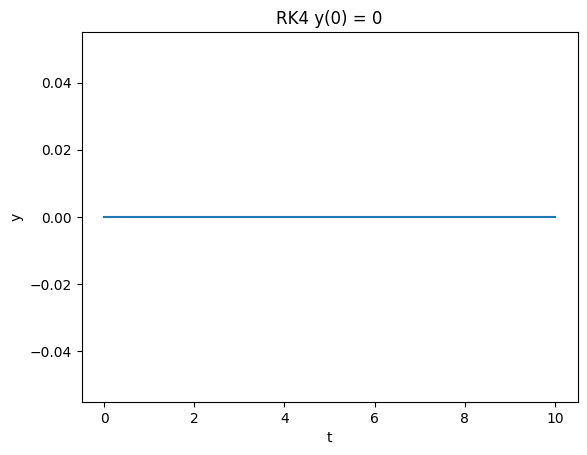

In [5]:
h = 0.1
t = np.linspace(0, 10, int(10/h))
y = RK4(f3, 0, t)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.title('RK4 y(0) = 0')

Text(0.5, 1.0, 'RK4 y(-1) = -1')

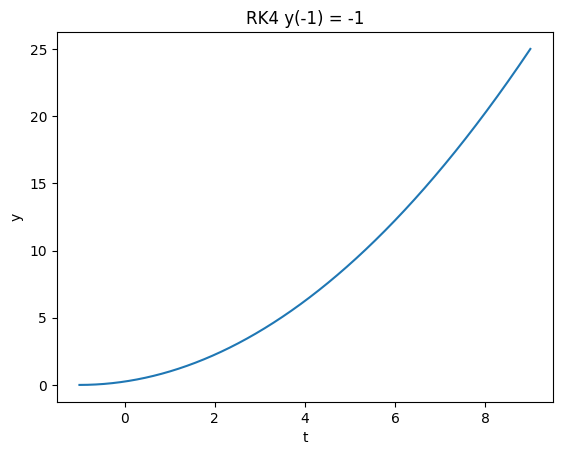

In [6]:
# t, y = RK4(f3, -1, -1, 9, 1e-3)
h = 1e-3
t = np.linspace(-1, 9, int(10/h))
y = RK4(f3, -1+0.999999999999, t)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.title('RK4 y(-1) = -1')

# find first value of our solution which fulfills abs(y) < 1e-4
# t_stuck = (t[np.where(abs(y) < 1e-4)])
# t_first_stuck = t_stuck[0]
# t_last_stuck = t_stuck[-1]
# # shade this region
# plt.axvspan(t_first_stuck, t_last_stuck, color='red', alpha=0.2)
# print(t_last_stuck - t_first_stuck)

#0.03999899999892986

# 4. PANG
y' = y^2

In [7]:
f4 = lambda t, y: y**2

/var/folders/1_/6r0r3l957vncw7m3w127mry00000gn/T/ipykernel_23834/79422809.py:1: RuntimeWarning: overflow encountered in double_scalars
  f4 = lambda t, y: y**2


Text(0.5, 1.0, 'RK4 y(0) = 0.91, end=1.098903')

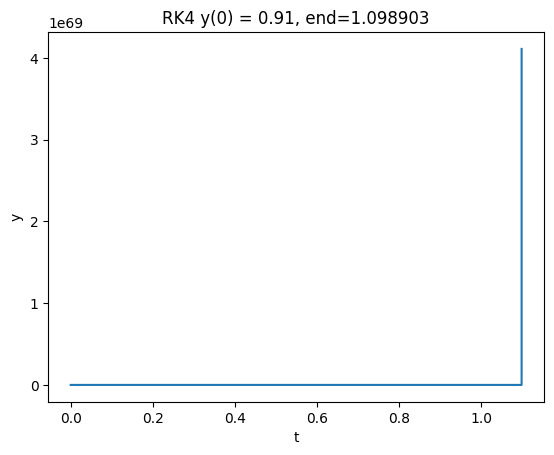

In [8]:
C = N/100
h = 1e-6
t = np.linspace(0, 1.5, int(1.5/h))
y = RK4(f4, C, t)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
t_last = t[(np.where(np.isfinite(y)))][-1]
plt.title(f'RK4 y(0) = 0.91, end={t_last:.6f}')


# 5. Inte PANG
y'=y

In [9]:
f5 = lambda t, y: y

In [10]:
k = 6
max = 2**k
h = 1e-3
t = np.linspace(0, max, int(max/h)+1)
y = RK4(f5, N, t)

for i in range(k+1):
    y_num = y[int(2**i/h)]
    y_an = N*math.exp(2**i)
    if abs(y_num - y_an) < 0.005:
        print(f'i={i}, y(2^{i})={y_num}')
    

i=0, y(2^0)=247.36364638977142
i=1, y(2^1)=672.4041050026772
i=2, y(2^2)=4968.4316530159485
i=3, y(2^3)=271267.1768207778
i=4, y(2^4)=808636057.3661005


# 6 Vad är π?
y'' + y' = 0

In [11]:
def RK4_0(f, y0, h):
    # RK4 which ends at y = 0. We want to find t at this point.
    # if
    getcontext().prec = 40
    y = np.array([Decimal(str(x)) for x in y0], dtype=object)
    t = Decimal(0)
    while True:
        k1 = h*f(t, y)
        k2 = h*f(t + h/2, y + k1/2)
        k3 = h*f(t + h/2, y + k2/2)
        k4 = h*f(t + h, y + k3)
        y_new = y + (k1 + 2*k2 + 2*k3 + k4)/6
        t_new = t + h
        if y_new[0] < 0:
            if abs(y_new[0]) < Decimal('1e-30'):
                # use linear interpolation between last two points
                return t_new
            h /= 2
            continue
        y = y_new
        t = t_new

In [12]:
f6 = lambda t, y: np.array([-y[1], y[0]])

In [13]:
t = RK4_0(f6, [1, 0], Decimal('1e-5'))
pi_est = 2*t
pi = Decimal('3.141592653589793238462643383279')
# want it correct to 20 decimal places
est_str = f'{pi_est:.22f}'
pi_str = f'{pi:.22f}'
print(est_str)
print(pi_str)

3.1415926535897932384629
3.1415926535897932384626


# 7 Newton!

In [14]:
def f_gravity_vector(x_own, x_body, body_mass):
    diff_vector = x_own-x_body
    return body_mass * diff_vector/np.linalg.norm(diff_vector)**3

In [15]:
def f7(t, y):
    G = 1
    return np.concatenate((
        y[2:], 
        -G*f_gravity_vector(y[:2], np.array([0, 0]), 1)
        ))

In [16]:
def semi_implicit_euler(f, y0, t):
    n = len(t)
    m = len(y0)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        h = t[i+1] - t[i]
        dv = h*f(t[i], y[i])[m//2:]
        y[i+1][m//2:] = y[i][m//2:] + dv
        y[i+1][:m//2] = y[i][:m//2] + h*y[i+1][m//2:]
    return y

(-0.7, 0.7)

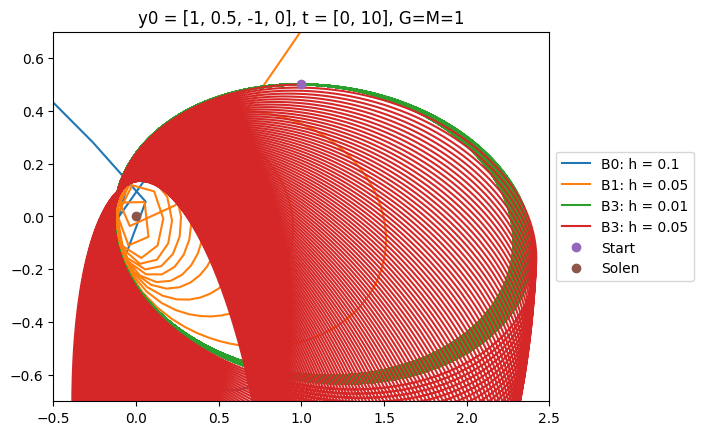

In [17]:
y0 = np.array([1, 0.5, -1, 0])  
# B0
tau0 = np.linspace(0, 1000, 10000)
y = RK4(f7, y0, tau0)
plt.plot(y[:,0], y[:,1], label = 'B0: h = 0.1')

# B1
tau1 = np.linspace(0, 1000, 20000)
y = RK4(f7, y0, tau1)
plt.plot(y[:,0], y[:,1], label = 'B1: h = 0.05')

# B2
tau2 = np.linspace(0, 1000, 100000)
y = RK4(f7, y0, tau2)
plt.plot(y[:,0], y[:,1], label = 'B3: h = 0.01')

# B3
y = semi_implicit_euler(f7, y0, tau2)
plt.plot(y[:,0], y[:,1], label = 'B3: h = 0.05')

plt.title('y0 = [1, 0.5, -1, 0], t = [0, 10], G=M=1')
plt.plot(y0[0], y0[1], 'o', label='Start')
plt.plot(0, 0, 'o', label='Solen')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-0.5, 2.5)
plt.ylim(-0.7, 0.7)

# 8 Newton revisited (something for nothing)

In [35]:
def f8(t, y):
    G = 4*math.pi**2
    M_sun = 1
    M_jupiter = 1/1047.945205479452
    M_earth = 1/332946.0483870968
    sun_pos = np.array([0, 0])
    jupiter_pos = y[0:2]
    earth_pos = y[2:4]
    rocket_pos = y[4:6]
    # jupiter, earth, rocket
    return np.concatenate((
        y[6:8], # = jupiter vel
        y[8:10], # = earth vel
        y[10:12], # = rocket vel
        -G*(f_gravity_vector(jupiter_pos, sun_pos, M_sun) + f_gravity_vector(jupiter_pos, earth_pos, M_earth)),  # = jupiter acc
        -G*(f_gravity_vector(earth_pos, sun_pos, M_sun) + f_gravity_vector(earth_pos, jupiter_pos, M_jupiter)), # = earth acc
        -G*(f_gravity_vector(rocket_pos, sun_pos, M_sun) + f_gravity_vector(rocket_pos, jupiter_pos, M_jupiter) + f_gravity_vector(rocket_pos, earth_pos, M_earth)) # rocket acc
    ))
    

In [48]:
GM = 4 * math.pi**2
earth_pos = np.array([1, 0])
earth_vel = np.array([0, np.sqrt(GM/np.linalg.norm(earth_pos))])
rocket_pos = np.array([1.01, 0])
rocket_vel_magnitude = 0.95*np.sqrt(2*GM/np.linalg.norm(rocket_pos))
rocket_direction = np.array([0, 1])
rocket_vel = rocket_vel_magnitude*rocket_direction/np.linalg.norm(rocket_direction)

jupiter_orbit_T = 11.857824421031035
pass_t = 1.439
p = [-4.193889869202012, 3.0756470115284253]
g_assist_theta = np.arctan2(p[1], p[0])
theta = g_assist_theta - 2*math.pi*pass_t/jupiter_orbit_T
jupiter_pos = 5.2*np.array([np.cos(theta), np.sin(theta)])
print(jupiter_pos)
jupiter_vel_magnitude = np.sqrt(GM/np.linalg.norm(jupiter_pos))
jupiter_vel = jupiter_vel_magnitude * np.array([-np.sin(theta), np.cos(theta)])

n = 100000

[-0.90810198  5.12009285]


In [46]:
# same step size. used for when jupiter is in narnia
shit_jupiter_pos = np.array([0, 5.2])
shit_jupiter_vel = np.array([-jupiter_vel_magnitude, 0])
y0 = np.concatenate((shit_jupiter_pos, earth_pos, rocket_pos, shit_jupiter_vel, earth_vel, rocket_vel))
t = np.linspace(0, 12, n)
y = RK4(f8, y0, t)

In [50]:
# smaller step size around pass, used for real run
y0 = np.concatenate((jupiter_pos, earth_pos, rocket_pos, jupiter_vel, earth_vel, rocket_vel))
d = 0.01
t_close_start = pass_t - d
t_close_end = pass_t + d

t = np.linspace(0, t_close_start, n)
y = RK4(f8, y0, t)

y1 = y[-1]
t_close = np.linspace(t_close_start, t_close_end, n)
y_close = RK4(f8, y1, t_close)

y2 = y_close[-1]
t_rest = np.linspace(t_close_end, 5, n)
y_rest = RK4(f8, y2, t_rest)

t = np.concatenate((t, t_close, t_rest))
y = np.concatenate((y, y_close, y_rest))

In [54]:
# first value where rocket is morem than 5.2 AU from sun
# used to initially set the position of jupiter. 
# ran once, then updated jupiter_pos and ran again
mask = np.where(np.sqrt(y[:,4]**2+y[:,5]**2) > 5.2)
t_rocket_crosses_orbit = t[mask][0]
pass_pos = y[mask][0, 4:6]
print('t_rocket_crosses_orbit', t_rocket_crosses_orbit)
print('pass_pos', list(pass_pos))

# the closest point between the rocket and jupiter.
# used this to update jupiter's position twice in the same way as above
rocket_jupiter_diff = y[:,4:6] - y[:,0:2]
min_dist = np.min(np.linalg.norm(rocket_jupiter_diff, axis=1))
idx = np.argmin(np.linalg.norm(rocket_jupiter_diff, axis=1))
pos_mindist = y[idx, 4:6]
print('min_dist', min_dist)
print('idx', idx)
print('t_mindist', t[idx])
print('pos_mindist', list(pos_mindist))

force = -1*f_gravity_vector(y[idx, 4:6], y[idx, 0:2], 1/1047.945205479452)
force_sun = -1*f_gravity_vector(y[idx, 4:6], np.array([0, 0]), 1)
print('max_force_jupiter', force)

# final velocity of the rocket in the y direction
final_vel = y[-1, 10:12]
final_vel_y = final_vel[1]
final_pos = y[-1, 4:6]
escape_vel_final_pos = np.sqrt(2*GM/np.linalg.norm(final_pos))
print('final_vel', list(final_vel))
print('final_pos', list(final_pos))
print('final_vel_y', final_vel_y)
print('escape_vel_final_pos', escape_vel_final_pos)

t_rocket_crosses_orbit 1.4395955059550596
pass_pos [-4.194084984037876, 3.074029102317735]
min_dist 0.00018572427378181678
idx 153021
t_mindist 1.4396043060430606
pos_mindist [-4.194270920682513, 3.0740068469901134]
max_force_jupiter [  6522.88571059 -26884.58610403]
final_vel [0.8127891495400876, 3.838981115990704]
final_pos [-3.7205684061174873, -12.831186720854685]
final_vel_y 3.838981115990704
escape_vel_final_pos 2.431063322822905


(-5.51048536633299, 1.3204993031587138, -13.728750699390183, 6.017656828390777)

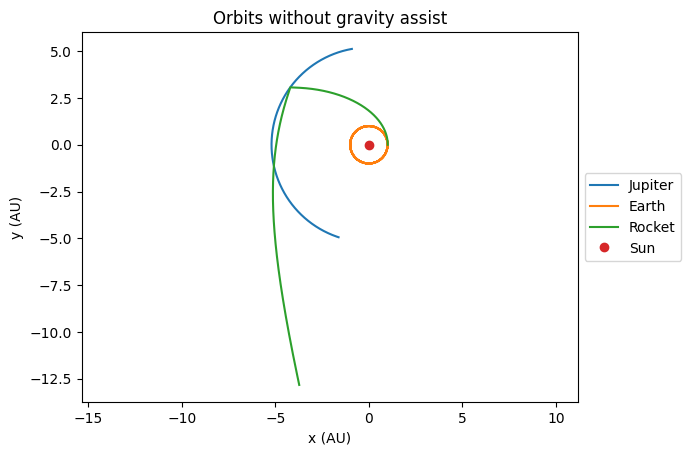

In [52]:
plt.plot(y[:,0], y[:,1], label='Jupiter')
plt.plot(y[:,2], y[:,3], label='Earth')
plt.plot(y[:,4], y[:,5], label='Rocket')
plt.plot(0, 0, 'o', label='Sun')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Orbits without gravity assist')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.axis('equal')

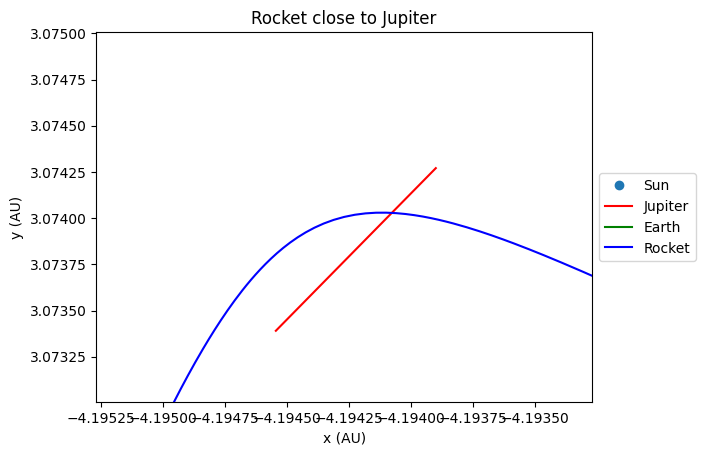

In [30]:
y_subsample = y[idx-1000:idx+1000:10]
fig, ax = plt.subplots()
ax.plot(0, 0, 'o', label='Sun')
ln1, = ax.plot([], [], 'r-', label='Jupiter')
ln2, = ax.plot([], [], 'g-', label='Earth')
ln3, = ax.plot([], [], 'b-', label='Rocket')


d = 0.001
def init():
    ax.set_xlim(pos_mindist[0]-d, pos_mindist[0]+d)
    ax.set_ylim(pos_mindist[1]-d, pos_mindist[1]+d)
    ax.set_xlabel('x (AU)')
    ax.set_ylabel('y (AU)')
    ax.set_title('Rocket close to Jupiter')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return ln1, ln2, ln3,

def update(frame):
    ln1.set_data(y_subsample[:frame, 0], y_subsample[:frame, 1])
    ln2.set_data(y_subsample[:frame, 2], y_subsample[:frame, 3])
    ln3.set_data(y_subsample[:frame, 4], y_subsample[:frame, 5])
    return ln1, ln2, ln3,

ani = FuncAnimation(fig, update, frames=len(y_subsample), init_func=init, blit=True)
ani.save("newton2.gif", writer=PillowWriter(fps=10))